# Coaxial Waveguide

## Cutoff frequency of PEC wavefuide


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pymwm
plt.style.use('seaborn-notebook')
plot_params = {
    'figure.dpi': 96,
    'axes.labelsize': 'xx-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'legend.fontsize': 'large',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.03,
}
plt.rcParams.update(plot_params)

In [2]:
import numpy as np
import scipy.special as sp
import numpy.testing as npt
import pymwm
from pymwm.cutoff import Cutoff

co = Cutoff(16, 8)

In [3]:
co(('E', 1, 2), 0.5)

6.5649423823227595

(0.0, 30000.0)

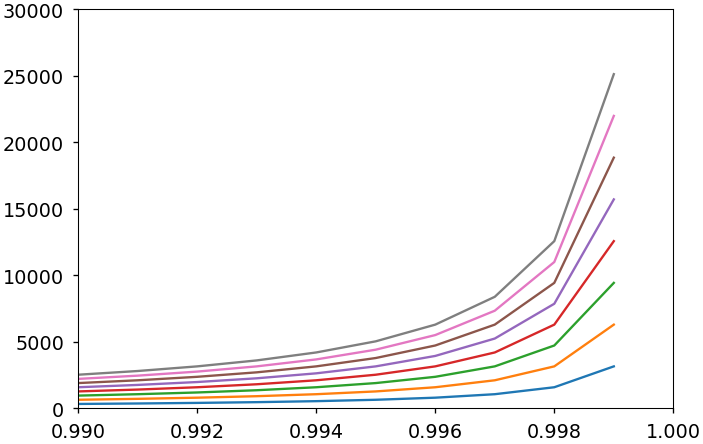

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

n = 0
for m in range(8):
    df = co.samples.query(f"pol == 'E' and n == {n} and m == {m + 1}")
    plt.plot(df['rr'], df['val'], label=f"E{n}{m + 1}")
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0.99,1.0)
plt.ylim(0,30000)

#0.999まで有効

(0.0, 25000.0)

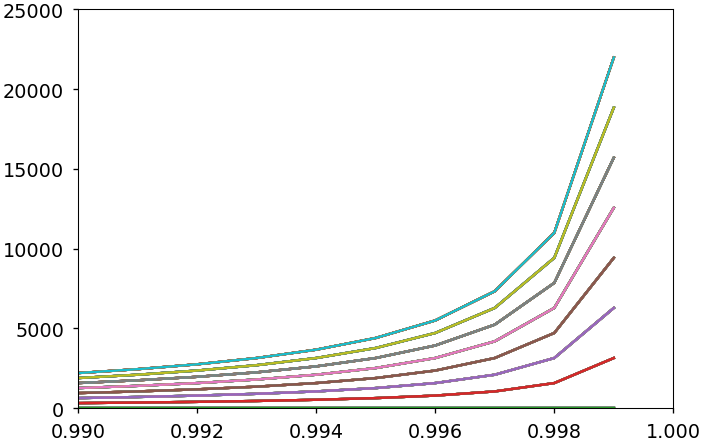

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

for n in range(1, 16):
    for m in range(8):
        df = co.samples.query(f"pol == 'E' and n == {n} and m == {m + 1}")
        plt.plot(df['rr'], df['val'], label=f"E{n}{m + 1}")
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0.99,1.0)
plt.ylim(0,25000)

#0.999まで有効

(0.0, 0.1)

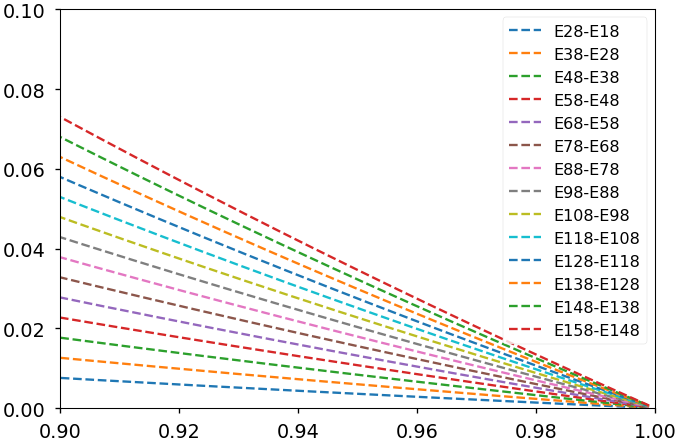

In [6]:
for m in range(7, 8):
    for n in range(1, 15):
        df1 = co.samples.query(f"pol=='E' and n=={n} and m=={m+1}")
        df2 = co.samples.query(f"pol=='E' and n=={n+1} and m=={m+1}")
        val_dif = df2['val'].to_numpy() - df1['val'].to_numpy()
        plt.plot(df1['rr'], val_dif, "--", label=f"E{n+1}{m+1}-E{n}{m+1}")
        
plt.legend()

plt.xlim(0.9,1)
plt.ylim(0,0.1)

(0.0, 30000.0)

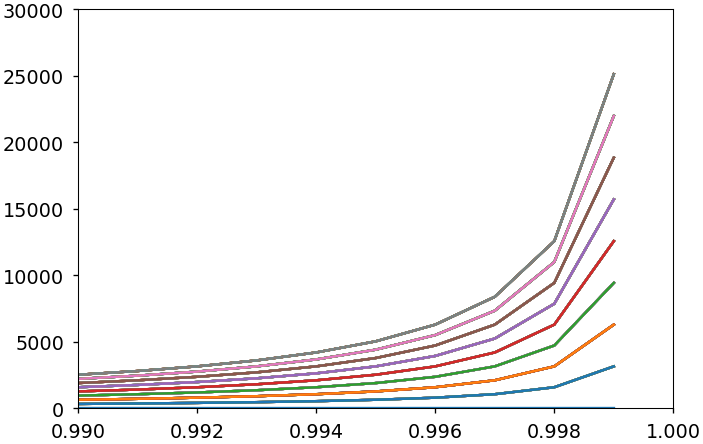

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

for n in range(16):
    for m in range(8):
        df = co.samples.query(f"pol=='M' and n=={n} and m=={m+1}")
        plt.plot(df['rr'], df['val'], label=f"M{n}{m+1}")
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1, fontsize=7)

plt.xlim(0.99, 1)
plt.ylim(0,30000)

#0.999まで有効

# Dispersion relation

2021-10-19 10:43:34,753	INFO services.py:1250 -- View the Ray dashboard at http://127.0.0.1:8265


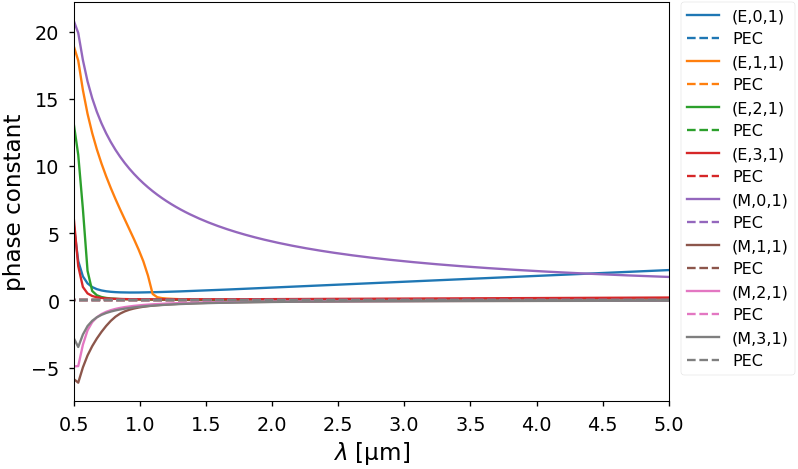

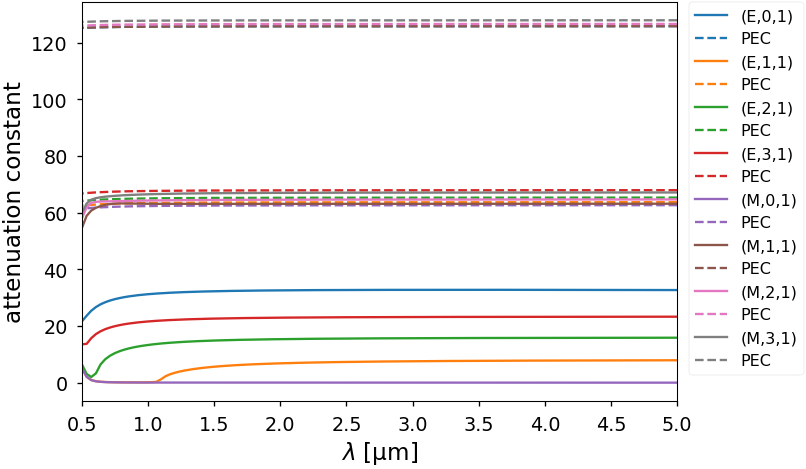

In [8]:
wl_max = 5.0
wl_min = 0.5
params: dict = {
    "core": {"shape": "coax", "r": 0.15, "ri": 0.1, "fill": {"RI": 1.0}},
    "clad": {"book": "Au", "page": "Stewart-DLF", "bound_check": False},
    "bounds": {"wl_max": wl_max, "wl_min": wl_min, "wl_imag": 100.0},
    "modes": {"num_n": 6, "num_m": 2},
}
wg1 = pymwm.create(params)
wg1.plot_beta(('E', 0, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
wg1.plot_beta(('E', 1, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
wg1.plot_beta(('E', 2, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
wg1.plot_beta(('E', 3, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
wg1.plot_beta(('M', 0, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
wg1.plot_beta(('M', 1, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
wg1.plot_beta(('M', 2, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
wg1.plot_beta(('M', 3, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='real')
plt.show()
wg1.plot_beta(('E', 0, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
wg1.plot_beta(('E', 1, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
wg1.plot_beta(('E', 2, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
wg1.plot_beta(('E', 3, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
wg1.plot_beta(('M', 0, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
wg1.plot_beta(('M', 1, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
wg1.plot_beta(('M', 2, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
wg1.plot_beta(('M', 3, 1), "-", wl_max=wl_max, wl_min=wl_min, comp='imag')
plt.show()

In [9]:
wg1.alpha_all

[('E', 1, 1),
 ('E', 1, 2),
 ('E', 2, 1),
 ('E', 2, 2),
 ('E', 3, 1),
 ('E', 4, 1),
 ('E', 5, 1),
 ('M', 0, 1),
 ('M', 0, 2),
 ('M', 1, 1),
 ('M', 1, 2),
 ('M', 2, 1),
 ('M', 2, 2),
 ('M', 3, 1),
 ('M', 3, 2),
 ('M', 4, 1),
 ('M', 4, 2),
 ('M', 5, 1),
 ('M', 5, 2),
 ('E', 0, 1),
 ('E', 1, 1),
 ('E', 1, 2),
 ('E', 2, 1),
 ('E', 2, 2),
 ('E', 3, 1),
 ('E', 4, 1),
 ('E', 5, 1),
 ('M', 1, 1),
 ('M', 1, 2),
 ('M', 2, 1),
 ('M', 2, 2),
 ('M', 3, 1),
 ('M', 3, 2),
 ('M', 4, 1),
 ('M', 4, 2),
 ('M', 5, 1),
 ('M', 5, 2)]

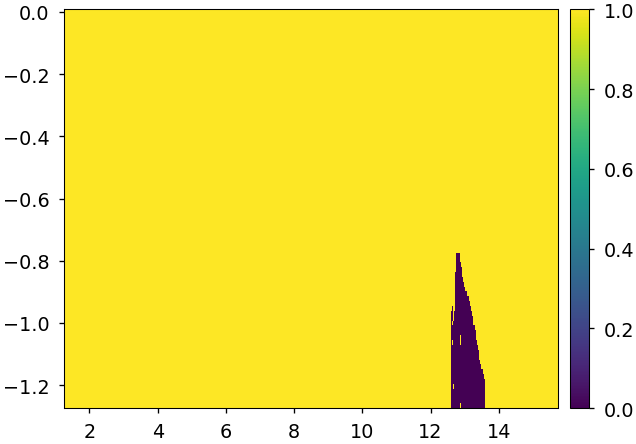

In [10]:
wl_max = 5.0
wl_min = 0.5
params: dict = {
    "core": {"shape": "coax", "r": 0.15, "ri": 0.1, "fill": {"RI": 1.0}},
    "clad": {"book": "Au", "page": "Stewart-DLF", "bound_check": False},
    "bounds": {"wl_max": wl_max, "wl_min": wl_min, "wl_imag": 100.0},
    "modes": {"num_n": 6, "num_m": 2},
}
wg = pymwm.create(params)
betas, convs, samples = wg.betas_convs_samples(params)
samples.plot_convs(convs, ('E', 2, 1))
